In [61]:
import numpy as np
import matplotlib.pyplot as plt


In [23]:
# support vector machine classifier

class SVM_classifier():

    # initiating the hyperparameters
    def __init__(self, learning_rate, no_of_iterations, lamda_parameter ):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lamda_parameter

    # fitting the dataset to svm classifier
    def fit(self,X, Y):

        # data points and features
        self.m, self.n = X.shape

        # initiating the weight value and bias value
        
        self.w = np.zeros(self.n)
        self.b = 0

        self.X = X
        self.Y = Y

        # gradient descent 
        for i in range(self.no_of_iterations):
            self.update_weights()
        
    
    # function for updating the weight and bias value
    def update_weights(self):
        y_label = np.where(self.Y <= 0,-1,1 )

        for index, x_i in enumerate(self.X):

            condition = y_label[index]*(np.dot(x_i, self.w) - self.b) >= 1

            if (condition == True):
                dw = 2 * self.lambda_parameter*self.w
                db = 0
            else:
                dw = 2 * self.lambda_parameter * self.w - np.dot(x_i,y_label[index])
                db = y_label[index]
            
            self.w  = self.w - self.learning_rate*dw
            self.b  = self.b - self.learning_rate*db
    
    # prediction
    def predict(self,X):
        output = np.dot(X, self.w) - self.b
        predict_labels = np.sign(output)

        y_hat = np.where(predict_labels < 0, 0,1)
        return y_hat

In [24]:
# import libraries
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [25]:
# data preprocessing
diabetes_data = pd.read_csv("Data sets/diabetes.csv")

In [26]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
# finding the number of rows and columns
diabetes_data.shape

(768, 9)

In [28]:
# getting the statistical measures 
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [30]:
# separating features and target

features = diabetes_data.drop(columns = "Outcome", axis = 1)

target = (diabetes_data['Outcome'])

print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [31]:
# data standardization 
scaler = StandardScaler()

scaler.fit(features)

StandardScaler()

In [32]:
standarized_data = scaler.transform(features)

In [33]:

features = standarized_data

In [34]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.2, random_state = 44)

In [56]:
# creating an instance of svm_classifier
classifier = SVM_classifier(0.1, 1000, 0.1)

In [57]:
# training
classifier.fit(X_train, Y_train)

In [58]:
# Model evaluation
X_train_prediction = classifier.predict(X_train)
training_accuracy = accuracy_score(Y_train, X_train_prediction)

X_test_prediction = classifier.predict(X_test)
testing_accuracy = accuracy_score(Y_test, X_test_prediction)

In [59]:
print(f'The training accuracy is {training_accuracy*100}% ')
print(f'The testing accuracy is {testing_accuracy*100}% ')

The training accuracy is 75.8957654723127% 
The testing accuracy is 79.22077922077922% 


In [60]:
# parametric experiment for different learning rates

learning_rates = np.linspace(0.01,0.1,50)
test_accuracies = []
training_accuracies = []
for i in learning_rates:

    # creating an instance of svm_classifier
    classifier = SVM_classifier(i, 1000, 0.1)

    # training
    classifier.fit(X_train, Y_train)
    # Model evaluation
    X_train_prediction = classifier.predict(X_train)
    training_accuracy = accuracy_score(Y_train, X_train_prediction)
    training_accuracies.append(training_accuracy*100)

    X_test_prediction = classifier.predict(X_test)
    testing_accuracy = accuracy_score(Y_test, X_test_prediction)
    test_accuracies.append(testing_accuracy*100)

    
    print(f'The training accuracy is {training_accuracy*100}% ')
    print(f'The testing accuracy is {testing_accuracy*100}% ')

    print('\n\n')




The training accuracy is 77.52442996742671% 
The testing accuracy is 77.27272727272727% 
The training accuracy is 77.52442996742671% 
The testing accuracy is 77.27272727272727% 
The training accuracy is 77.0358306188925% 
The testing accuracy is 77.92207792207793% 
The training accuracy is 77.19869706840392% 
The testing accuracy is 78.57142857142857% 
The training accuracy is 77.19869706840392% 
The testing accuracy is 78.57142857142857% 
The training accuracy is 77.0358306188925% 
The testing accuracy is 78.57142857142857% 
The training accuracy is 77.0358306188925% 
The testing accuracy is 79.22077922077922% 
The training accuracy is 77.36156351791531% 
The testing accuracy is 77.27272727272727% 
The training accuracy is 76.8729641693811% 
The testing accuracy is 79.87012987012987% 
The training accuracy is 76.71009771986971% 
The testing accuracy is 79.87012987012987% 
The training accuracy is 76.71009771986971% 
The testing accuracy is 79.87012987012987% 
The training accuracy is 

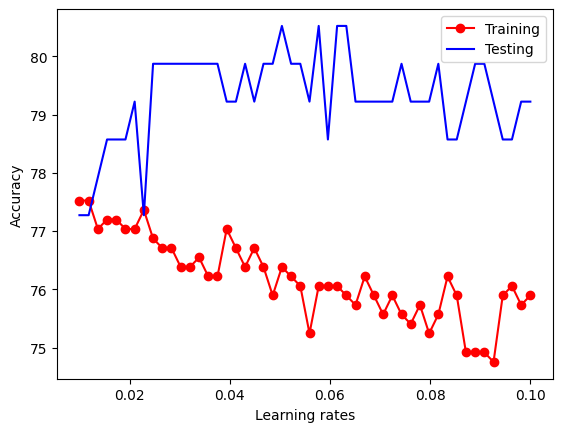

In [63]:
# plotting the experiment
plt.plot(learning_rates,training_accuracies, 'ro-', label = 'Training')
plt.plot(learning_rates,test_accuracies, 'b-', label = 'Testing')
plt.xlabel("Learning rates")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [64]:
# parametric experiment for different regularizing rate(lambda)
lambda_rates = np.linspace(0.01,0.1,50)
test_accuracies = []
training_accuracies = []
for i in learning_rates:

    # creating an instance of svm_classifier
    classifier = SVM_classifier(i, 1000, 0.1)

    # training
    classifier.fit(X_train, Y_train)
    # Model evaluation
    X_train_prediction = classifier.predict(X_train)
    training_accuracy = accuracy_score(Y_train, X_train_prediction)
    training_accuracies.append(training_accuracy*100)

    X_test_prediction = classifier.predict(X_test)
    testing_accuracy = accuracy_score(Y_test, X_test_prediction)
    test_accuracies.append(testing_accuracy*100)

    
    print(f'The training accuracy is {training_accuracy*100}% ')
    print(f'The testing accuracy is {testing_accuracy*100}% ')

    print('\n')




The training accuracy is 77.52442996742671% 
The testing accuracy is 77.27272727272727% 



The training accuracy is 77.52442996742671% 
The testing accuracy is 77.27272727272727% 



The training accuracy is 77.0358306188925% 
The testing accuracy is 77.92207792207793% 



The training accuracy is 77.19869706840392% 
The testing accuracy is 78.57142857142857% 



The training accuracy is 77.19869706840392% 
The testing accuracy is 78.57142857142857% 



The training accuracy is 77.0358306188925% 
The testing accuracy is 78.57142857142857% 



The training accuracy is 77.0358306188925% 
The testing accuracy is 79.22077922077922% 



The training accuracy is 77.36156351791531% 
The testing accuracy is 77.27272727272727% 



The training accuracy is 76.8729641693811% 
The testing accuracy is 79.87012987012987% 



The training accuracy is 76.71009771986971% 
The testing accuracy is 79.87012987012987% 



The training accuracy is 76.71009771986971% 
The testing accuracy is 79.870129870129

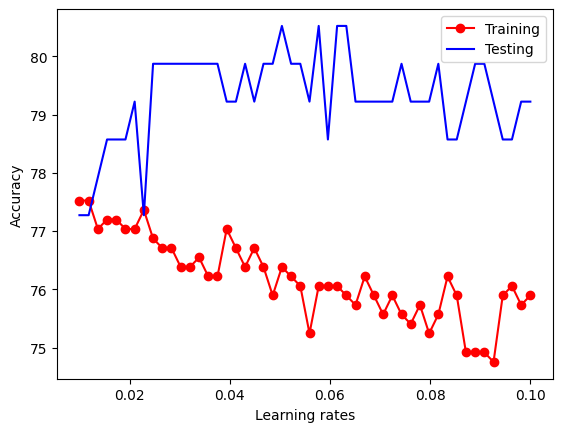

In [65]:
# plotting the experiment
plt.plot(lambda_rates,training_accuracies, 'ro-', label = 'Training')
plt.plot(lambda_rates,test_accuracies, 'b-', label = 'Testing')
plt.xlabel("Learning rates")
plt.ylabel("Accuracy")
plt.legend()
plt.show()